In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
# Exercise
#
# Download employee retention dataset from here:
# https://www.kaggle.com/giripujar/hr-analytics.
#
#1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
# 2.Plot bar charts showing impact of employee salaries on retention
# 3.Plot bar charts showing correlation between department and employee retention
# 4.Now build logistic regression model using variables that were narrowed down in step1
# 5.Measure the accuracy of the model

In [6]:
df=pd.read_csv('/Users/hare/Downloads/HR_comma_sep.csv')

In [7]:
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
#as we have been provided with a column named as LEFT with specifies whether a person has left the company with 1 and stayed as 0;

In [9]:
df['left'].value_counts()


left
0    11428
1     3571
Name: count, dtype: int64

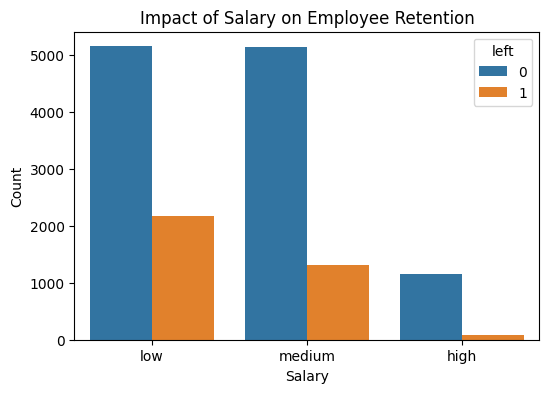

In [14]:
# 2.Plot bar charts showing impact of employee salaries on retention
#which means we need to show a bar graph having relation of employee salaries on #retention(should see if low salary employees leave more often.)
plt.figure(figsize=(6,4))
sns.countplot(x='salary', hue='left', data=df)
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()



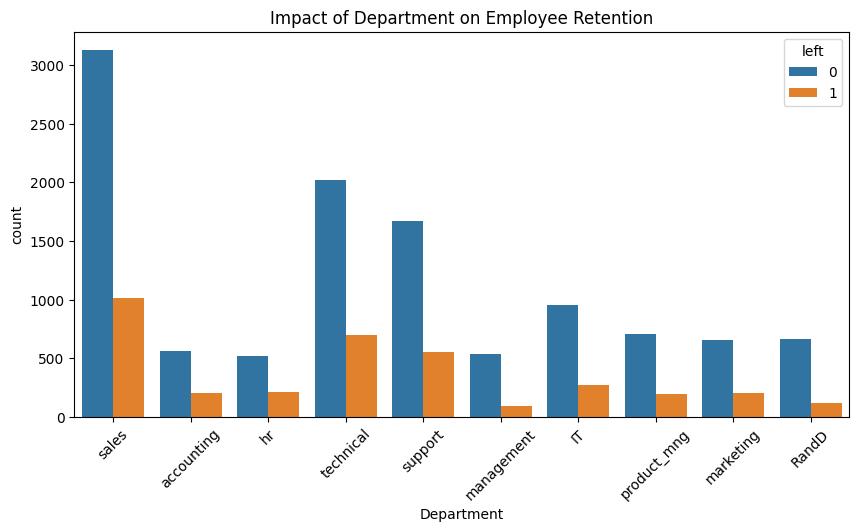

In [15]:
#3.Plot bar charts showing correlation between department and employee retention
#This shows which departments have higher attrition.
plt.figure(figsize=(10,5))
sns.countplot(x='Department', hue='left', data=df)
plt.title("Impact of Department on Employee Retention")
plt.xticks(rotation=45)
plt.show()


In [24]:
# 4.Now build logistic regression model using variables that were narrowed down in step1
# We’ll use:
# satisfaction_level
# average_montly_hours
# promotion_last_5years
# salary
# Department

# Convert categorical to numeric using dummy variables
df_clean = pd.get_dummies(df, columns=['salary','Department'], drop_first=True)

# Features (X) and target (y)
X = df_clean.drop('left', axis=1)
y = df_clean['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#Building Logistic_regression model:-
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



Accuracy: 0.7877777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      3459
           1       0.57      0.33      0.42      1041

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.64      4500
weighted avg       0.76      0.79      0.77      4500



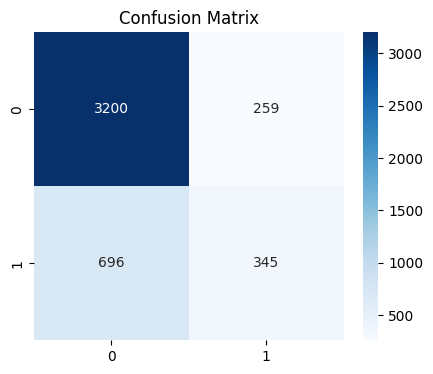

In [27]:
# 5.Measure the accuracy of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
